In [1]:
import pandas as pd

df = pd.read_excel('default of credit card clients.xls',header=1)

In [2]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [3]:
df.shape

(30000, 25)

In [4]:
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [5]:
df.SEX.replace({1:'male', 2:'female'}, inplace=True)

In [6]:
df.EDUCATION.replace({1: 'graduate school', 2 :'university', 3: 'high school', 4 :'others',5:'others', 6:'others', 0:'others'}, inplace=True)

In [7]:
df.MARRIAGE.replace({1:'married', 2:'single', 3:'others'}, inplace=True)

In [8]:
# df.set_index('ID', inplace=True)

In [9]:
df.rename(columns={'default payment next month': 'default'}, inplace=True)

In [10]:
df['default'].std()

0.41506180569093337

In [11]:
print(df.query('EDUCATION == "graduate school"')['default'].value_counts(normalize=1),
      df.query('EDUCATION == "university"')['default'].value_counts(normalize=1),
      df.query('EDUCATION == "others"')['default'].value_counts(normalize=1),
      df.query('EDUCATION == "high school"')['default'].value_counts(normalize=1), sep='\n')

0    0.807652
1    0.192348
Name: default, dtype: float64
0    0.762651
1    0.237349
Name: default, dtype: float64
0    0.929487
1    0.070513
Name: default, dtype: float64
0    0.748424
1    0.251576
Name: default, dtype: float64


In [12]:
from math import sqrt

df.query('EDUCATION == "graduate school"')['default'].std()**2

0.15536471661041473

In [13]:
df.query('EDUCATION == "high school"')['default'].std()**2

0.18832389843906816

In [14]:
sqrt((.15536+.18832)/2)

0.41453588505701167

In [15]:
(.1923-.2515)/.4145

-0.1428226779252111

In [16]:
print(df.query('EDUCATION == "graduate school"')['LIMIT_BAL'].mean(),
      df.query('EDUCATION == "university"')['LIMIT_BAL'].mean(),
    df.query('EDUCATION == "high school"')['LIMIT_BAL'].mean())

212956.06991025034 147062.4376336422 126550.27049013626


In [17]:
df.query('PAY_0 == -2 & PAY_2 == -2 & PAY_3 == -2 & PAY_4 == -2 & PAY_5 == -2 & PAY_6 == -2').iloc[:,8:20]

,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2
23,-2,-2,-2,-2,5512,19420,1473,560,0,0,19428,1473
33,-2,-2,-2,-2,10929,4152,22722,7521,71439,8981,4152,22827
34,-2,-2,-2,-2,13709,5006,31130,3180,0,5293,5006,31178
45,-2,-2,-2,-2,0,0,0,0,0,0,0,0
52,-2,-2,-2,-2,13465,7867,7600,11185,3544,464,7875,7600
...,...,...,...,...,...,...,...,...,...,...,...,...
29937,-2,-2,-2,-2,14075,6813,13482,2975,2029,888,6818,13482
29961,-2,-2,-2,-2,0,263,0,1368,101,955,263,0
29979,-2,-2,-2,-2,0,0,0,0,0,0,0,0
29983,-2,-2,-2,-2,1822,2872,2712,2882,9235,1719,2890,2720


In [18]:
df.drop(['BILL_AMT1', 'PAY_AMT6'], axis=1, inplace=True)

In [19]:
df.describe()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,0.221200
std,8660.398374,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,0.415062
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,0.000000
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,0.000000
max,30000.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,1.000000


In [20]:
df.default.value_counts()
6636/30000

0.2212

In [21]:
for i in range(0,5):
    df[f'payment_delta{i}'] = df[f'BILL_AMT{6-i}'] - df[f'PAY_AMT{5-i}']

In [22]:
df.MARRIAGE.replace(0,'others',inplace=True)

In [23]:
df.PAY_6.value_counts()

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64

In [24]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'default', 'payment_delta0',
       'payment_delta1', 'payment_delta2', 'payment_delta3', 'payment_delta4'],
      dtype='object')

In [25]:
rate = {}
for i in range(-2,9,1):
    rate[i] = df.query(f'PAY_6 >= {i} or PAY_5 >= {i} or PAY_4 >= {i} or PAY_3 >= {i} or PAY_2 >= {i} or PAY_0 >= {i}').loc[:,'default'].value_counts(normalize=True)[1]

In [26]:
print(rate)

{-2: 0.2212, -1: 0.2277437166110932, 0: 0.237774642209232, 1: 0.4272519614658854, 2: 0.4630071599045346, 3: 0.6286672254819782, 4: 0.6410891089108911, 5: 0.6397849462365591, 6: 0.717948717948718, 7: 0.7608695652173914, 8: 0.56}


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(16,8))
ax = sns.barplot(x = list(rate.keys()), y = list(rate.values()), linewidth=2.5, facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor=".2")
ax.set(xlabel='The Number of Months Since Last Payment', ylabel='The Rate of Default', title='The Rate of Default by Months Since a Payment')
plt.show()
plt.savefig('The rate of default by months since.png')

<Figure size 1600x800 with 1 Axes>

In [28]:
print(rate, sep='\n')

{-2: 0.2212, -1: 0.2277437166110932, 0: 0.237774642209232, 1: 0.4272519614658854, 2: 0.4630071599045346, 3: 0.6286672254819782, 4: 0.6410891089108911, 5: 0.6397849462365591, 6: 0.717948717948718, 7: 0.7608695652173914, 8: 0.56}


In [29]:
df.query('LIMIT_BAL < 50000')['default'].value_counts(normalize=True)

0    0.639295
1    0.360705
Name: default, dtype: float64

In [30]:
df.query('LIMIT_BAL < 140000 & LIMIT_BAL >= 50000')['default'].value_counts(normalize=True)

0    0.746139
1    0.253861
Name: default, dtype: float64

In [31]:
df.query('LIMIT_BAL < 240000 & LIMIT_BAL >= 140000')['default'].value_counts(normalize=True)

0    0.82169
1    0.17831
Name: default, dtype: float64

In [32]:
df.query('LIMIT_BAL >= 240000')['default'].value_counts(normalize=True)

0    0.857143
1    0.142857
Name: default, dtype: float64

In [33]:
df.MARRIAGE.value_counts()

single     15964
married    13659
others       377
Name: MARRIAGE, dtype: int64

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


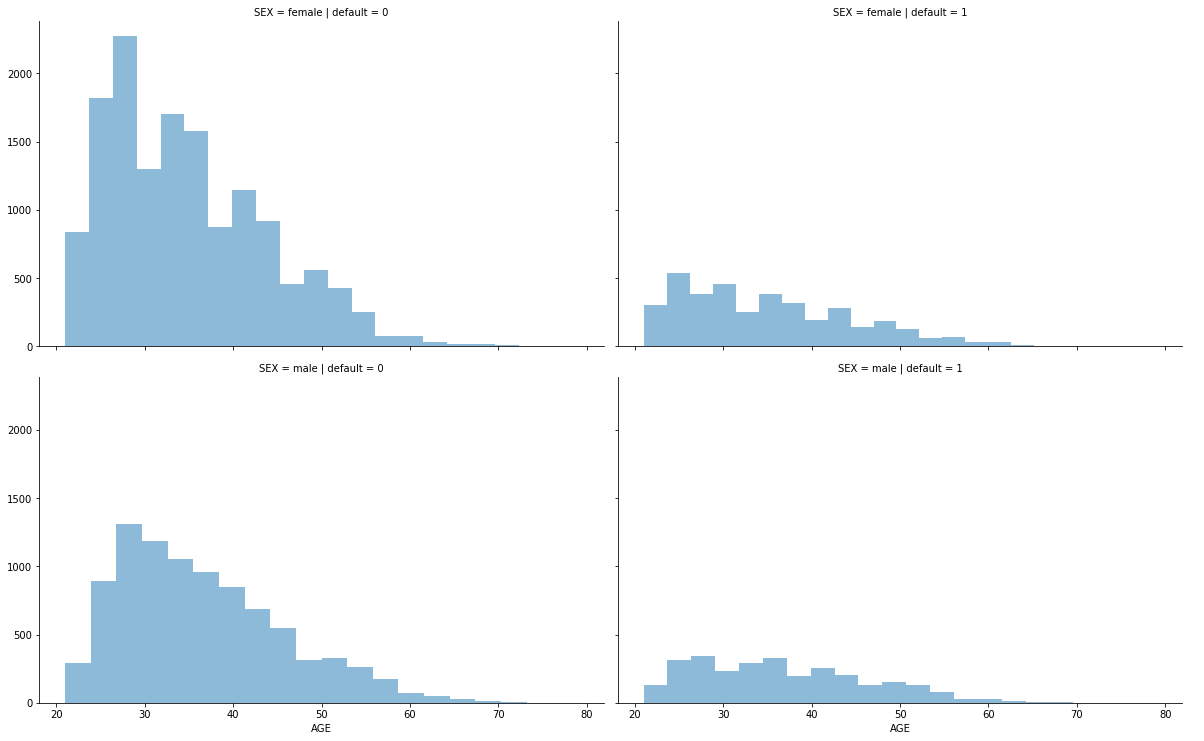

In [34]:
grid = sns.FacetGrid(df, col='default', row='SEX', size=5.2, aspect=1.6)
grid.map(plt.hist, 'AGE', alpha=.5, bins=20)
grid.add_legend()
plt.savefig('sex default age.png');

In [35]:
df = pd.get_dummies(df, drop_first=True)

In [36]:
df.default.value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [37]:
target = df['default']
features = df.drop('default', axis=1)

In [38]:
target.value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [39]:
6636/30000

0.2212

# Test train split

In [40]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target)

In [41]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.2

In [42]:
X_train_resampled.shape

(35012, 30)

In [43]:
pd.Series(y_train_resampled).value_counts()

1    17506
0    17506
dtype: int64

# Modeling

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

# Logistic Regression

In [45]:
logi = LogisticRegression(fit_intercept=False, solver='liblinear')
model = logi.fit(X_train, y_train)
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_hat_test = model.predict(X_test)
y_hat_train = model.predict(X_train)
acc_log = round(logi.score(X_train, y_train) * 100, 2)
acc_log

77.8

In [47]:
print(confusion_matrix(y_train, y_hat_train), confusion_matrix(y_test, y_hat_test), sep='\n---------------\n')

[[17506     0]
 [ 4994     0]]
---------------
[[5858    0]
 [1642    0]]


In [48]:
print('Logistic Regression:\n 1. train 2. test')
print(classification_report(y_train, y_hat_train), classification_report(y_test, y_hat_test), sep='\n-------------------------------------------------------\n')

Logistic Regression:
 1. train 2. test
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     17506
           1       0.00      0.00      0.00      4994

    accuracy                           0.78     22500
   macro avg       0.39      0.50      0.44     22500
weighted avg       0.61      0.78      0.68     22500

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5858
           1       0.00      0.00      0.00      1642

    accuracy                           0.78      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.61      0.78      0.69      7500



/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
logi_smoted = LogisticRegression(fit_intercept=False, solver='liblinear')
model_smoted = logi_smoted.fit(X_train_resampled, y_train_resampled)

In [50]:
y_hat_train_smoted = model_smoted.predict(X_train)
y_hat_test_smoted = model_smoted.predict(X_test)
acc_log = round(logi_smoted.score(X_train_resampled, y_train_resampled) * 100, 2)
acc_log

63.67

In [51]:
print(confusion_matrix(y_train, y_hat_train_smoted), confusion_matrix(y_test, y_hat_test_smoted), sep='\n---------------\n')

[[9976 7530]
 [1595 3399]]
---------------
[[3380 2478]
 [ 492 1150]]


In [52]:
print('Smoted Logistic Regression:\n 1. train 2. test')
print(classification_report(y_train, y_hat_train_smoted), classification_report(y_test, y_hat_test_smoted), sep='\n-------------------------------------------------------\n')

Smoted Logistic Regression:
 1. train 2. test
              precision    recall  f1-score   support

           0       0.86      0.57      0.69     17506
           1       0.31      0.68      0.43      4994

    accuracy                           0.59     22500
   macro avg       0.59      0.63      0.56     22500
weighted avg       0.74      0.59      0.63     22500

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.58      0.69      5858
           1       0.32      0.70      0.44      1642

    accuracy                           0.60      7500
   macro avg       0.59      0.64      0.57      7500
weighted avg       0.75      0.60      0.64      7500



0.7049958019868516 [  2.85378342   1.85378342   1.6097375  ...  -5.34388083  -5.68181112
 -33.4678048 ]
AUC: 0.7049958019868516


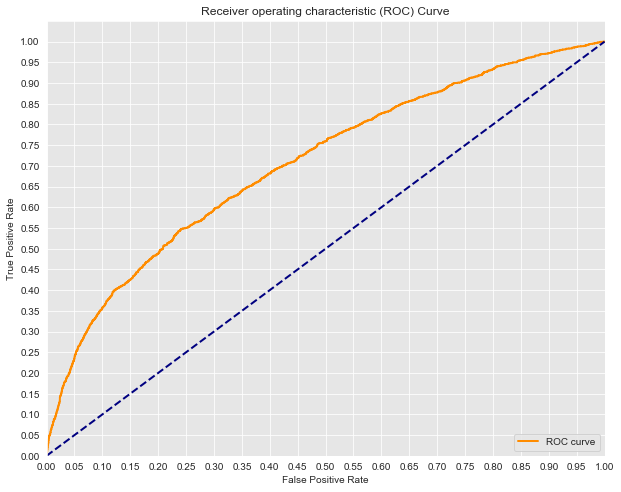

In [53]:
y_score = model_smoted.decision_function(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_score)

print(auc(fpr,tpr), threshold)

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [54]:
logi_smoted.coef_

array([[ 2.27223754e-06, -1.86753959e-06,  1.03897620e-02,
         3.39492239e-02,  2.57182023e-02,  2.25065471e-02,
         2.14785647e-02,  1.94997429e-02,  1.76064116e-02,
         4.55932994e-03,  4.54297666e-03,  4.45338111e-03,
         4.42037138e-03,  4.64462966e-03, -4.57824612e-03,
        -4.55930907e-03, -4.46489780e-03, -4.42916030e-03,
        -4.65212869e-03, -4.63979519e-03, -4.42063292e-03,
        -4.45261818e-03, -4.54302554e-03, -4.56093614e-03,
        -7.53793708e-03, -5.87185897e-03, -1.00770100e-03,
        -8.83835206e-03, -6.85112665e-04, -1.28057961e-02]])

# Support Vector Classification

In [55]:
svc = SVC()
param = {'C': [.1,10,100,1000]}
clf = GridSearchCV(svc, param)

In [ ]:
clf.fit(X_train_resampled, y_train_resampled)

In [ ]:
clf.best_params_

In [ ]:
svc = SVC(C=10)
svc.fit(X_train_resampled, y_train_resampled)
y_hat_train = svc.predict(X_train)
y_hat_test = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

In [ ]:
confusion_matrix(y_test, Y_pred)

In [ ]:
print('SVC:\n 1. train 2. test')
print(classification_report(y_train, y_hat_train), 
      classification_report(y_test, y_hat_test), 
      sep='\n-------------------------------------------------------\n')

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test).ravel()
print(tn, fp, fn, tp)

In [ ]:
y_score = svc.decision_function(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_score)

print(auc(fpr,tpr), threshold)

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# KNN 

In [ ]:
knn = KNeighborsClassifier(n_neighbors = i)

clf = GridSearchCV(knn, param_grid = {'n_neighbors': range(3,20,2)})
clf.fit(X_train_resampled, y_train_resampled)

In [ ]:
clf.best_params_

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_resampled, y_train_resampled)
y_hat_train = knn.predict(X_train)
y_hat_test = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

In [ ]:
confusion_matrix(y_test,y_hat_test)

In [ ]:
print('KNN:\n 1. train 2. test')
print(classification_report(y_train, y_hat_train), 
      classification_report(y_test, y_hat_test), 
      sep='\n-------------------------------------------------------\n')

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test).ravel()
print(tn, fp, fn, tp)

In [ ]:
y_score = knn.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_score[:,1])

print(auc(fpr,tpr), threshold)

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Naive Bayes

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train_resampled, y_train_resampled)
y_hat_train = gaussian.predict(X_train)
y_hat_test = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

In [ ]:
print('GaussianNB:\n 1. train 2. test')
print(classification_report(y_train, y_hat_train), 
      classification_report(y_test, y_hat_test), 
      sep='\n-------------------------------------------------------\n')

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test).ravel()
print(tn, fp, fn, tp)

In [ ]:
y_score = gaussian.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_score[:,1])

print(auc(fpr,tpr), threshold)

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Linear SVC

In [ ]:
linear_svc = LinearSVC()
clf = GridSearchCV(linear_svc, param_grid = {'C': [.1, 1, 10, 100]})
clf.fit(X_train_resampled, y_train_resampled)

In [ ]:
clf.best_params_

In [ ]:
linear_svc = LinearSVC(C= 100)
linear_svc.fit(X_train_resampled, y_train_resampled)
y_hat_train = linear_svc.predict(X_train)
y_hat_test = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

In [ ]:
print('Linear SVC:\n 1. train 2. test')
print(classification_report(y_train, y_hat_train), 
      classification_report(y_test, y_hat_test), 
      sep='\n-------------------------------------------------------\n')

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test).ravel()
print(tn, fp, fn, tp)

In [ ]:
y_score = linear_svc.decision_function(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_score)

print(auc(fpr,tpr), threshold)

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Stochastic Gradient Descent

In [ ]:
sgd = SGDClassifier()
sgd.fit(X_train_resampled, y_train_resampled)
y_hat_train = sgd.predict(X_train)
y_hat_test = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

In [ ]:
print('Stochastic Gradient Descent:\n 1. train 2. test')
print(classification_report(y_train, y_hat_train), 
      classification_report(y_test, y_hat_test), 
      sep='\n-------------------------------------------------------\n')

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test).ravel()
print(tn, fp, fn, tp)

In [ ]:
y_score = sgd.decision_function(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_score)

print(auc(fpr,tpr), threshold)

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Decision Tree

In [116]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_resampled, y_train_resampled)
y_hat_train = decision_tree.predict(X_train)
y_hat_test = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

100.0

In [119]:
#first we set up a grid of hyperparameters we want to "search over"
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9],
    'min_samples_split': [8, 10, 12, 14],
}

#then we conduct the "search"
gs = GridSearchCV(estimator = decision_tree, param_grid = param_grid, 
                          cv = 5)
gs.fit(X_train_resampled, y_train_resampled)
#finally we find the best hyperparameters
gs.best_params_

{'max_depth': 9,
 'max_features': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 8}

In [125]:
best_DT=gs.best_estimator_

best_dt = best_DT.fit(X_train_resampled, y_train_resampled)
y_hat_train = best_DT.predict(X_train)
y_hat_test = best_DT.predict(X_test)
best_DT.score(X_test, y_test)

0.7648

In [127]:
print('Decision Tree:\n 1. train 2. test')
print(classification_report(y_train, y_hat_train), 
      classification_report(y_test, y_hat_test), 
      sep='\n-------------------------------------------------------\n')

Decision Tree:
 1. train 2. test
              precision    recall  f1-score   support

           0       0.87      0.86      0.86     17505
           1       0.51      0.53      0.52      4995

    accuracy                           0.78     22500
   macro avg       0.69      0.69      0.69     22500
weighted avg       0.79      0.78      0.79     22500

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      5859
           1       0.47      0.50      0.48      1641

    accuracy                           0.76      7500
   macro avg       0.66      0.67      0.67      7500
weighted avg       0.77      0.76      0.77      7500



In [128]:
tn, fp, fn, tp = confusion_matrix(y_test, Y_pred).ravel()
print(tn, fp, fn, tp)

5574 285 1172 469


In [ ]:
from sklearn import tree
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG


labels = features.columns
plt.figure(figsize=(24,14))
graph = Source(tree.export_graphviz(best_DT, out_file=None, 
                                    feature_names=labels, class_names=['0', '1', '2'], 
                                    filled = True, max_depth = 2))
display(SVG(graph.pipe(format='svg')))
plt.savefig('decisiontree.png')

0.7084193871852852 [2.         1.         0.99707887 0.98905109 0.98847926 0.97916667
 0.95867769 0.94117647 0.9375     0.92763158 0.90909091 0.90625
 0.9030837  0.89655172 0.89473684 0.89041096 0.88461538 0.8755814
 0.875      0.87323944 0.85714286 0.84810127 0.84482759 0.83333333
 0.82857143 0.81081081 0.80636605 0.8        0.79918033 0.79545455
 0.79166667 0.79145729 0.79130435 0.78571429 0.75766871 0.75
 0.73830293 0.72460497 0.71707317 0.71428571 0.70472441 0.70212766
 0.70171674 0.69791667 0.69140625 0.68316832 0.67857143 0.66666667
 0.66       0.65625    0.6492891  0.64285714 0.63888889 0.63636364
 0.61538462 0.60606061 0.6        0.59090909 0.58426966 0.58333333
 0.57142857 0.5625     0.56       0.55555556 0.55102041 0.54761905
 0.54166667 0.53846154 0.53696498 0.52941176 0.52631579 0.52272727
 0.5        0.49751244 0.49       0.47126437 0.46666667 0.46341463
 0.45399393 0.45       0.44772118 0.43396226 0.42857143 0.41772152
 0.40804598 0.40495868 0.4        0.39776952 0.387755

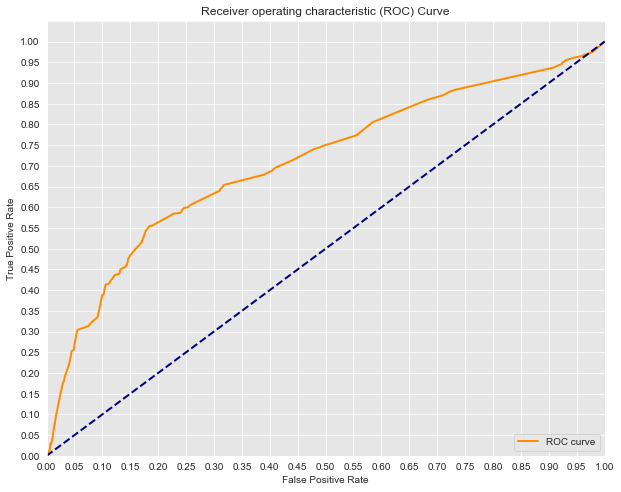

In [136]:
y_score = best_DT.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_score[:,1])

print(auc(fpr,tpr), threshold)

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show();

# Random Forest

In [146]:
random_forest = RandomForestClassifier(n_estimators=100,max_depth=5)
random_forest.fit(X_train_resampled, y_train_resampled)
y_hat_train = random_forest.predict(X_train)
y_hat_test = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

78.03

In [140]:
print('Decision Tree:\n 1. train 2. test')
print(classification_report(y_train, y_hat_train), 
      classification_report(y_test, y_hat_test), 
      sep='\n-------------------------------------------------------\n')

Decision Tree:
 1. train 2. test
              precision    recall  f1-score   support

           0       0.87      0.84      0.86     17505
           1       0.50      0.56      0.53      4995

    accuracy                           0.78     22500
   macro avg       0.69      0.70      0.69     22500
weighted avg       0.79      0.78      0.78     22500

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      5859
           1       0.50      0.57      0.53      1641

    accuracy                           0.78      7500
   macro avg       0.69      0.70      0.69      7500
weighted avg       0.79      0.78      0.78      7500



0.7650069649145743 [1.87649784 0.87649784 0.8641651  ... 0.18399086 0.18376879 0.16665507]
AUC: 0.7650069649145743


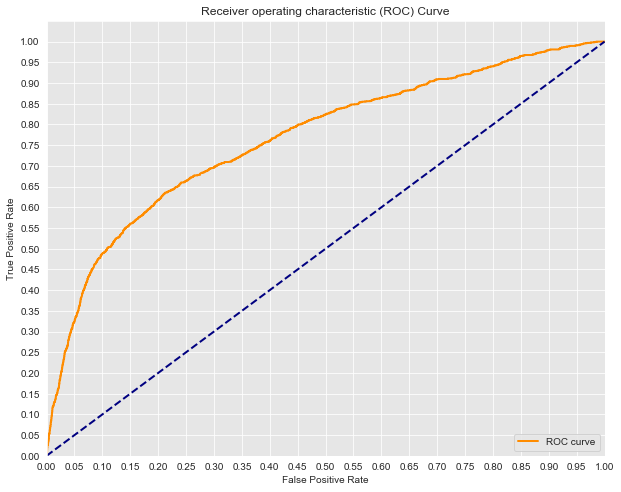

In [141]:
y_score = random_forest.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_score[:,1])

print(auc(fpr,tpr), threshold)

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [147]:
feature_importances = pd.DataFrame(random_forest.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [148]:
feature_importances

,importance
PAY_2,0.188529
PAY_0,0.184841
PAY_3,0.102886
MARRIAGE_single,0.090646
PAY_4,0.061790
PAY_5,0.046505
PAY_AMT1,0.042231
PAY_AMT2,0.038924
PAY_6,0.035654
EDUCATION_university,0.029428


In [142]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,100.00
7,Decision Tree,100.00
1,KNN,83.33
3,Random Forest,77.93
2,Logistic Regression,62.72
4,Naive Bayes,32.33
5,Stochastic Gradient Decent,26.25
6,Linear SVC,23.74
